# Data

In [7]:
import numpy as np
import pandas as pd
import missingno as msno
from plotnine import *
import matplotlib.pyplot as plt
import statistics as st
import factor_analyzer as fa
import light_famd as lf
import prince
import ipynb.fs.full.data_preprocessing_after_imputing as datapre
path="C:/Users/12783/Downloads/Simulated_Data_Train.csv"
pathVali="C:/Users/12783/Downloads/Simulated_Data_Validation.csv"
pathSDT="C:/Users/12783/Downloads/Simulated_Data_Test.csv"
datatrain=pd.read_csv(path)
dataVali=pd.read_csv(pathVali)

In [8]:
def deletion(dataframe):
    data=dataframe.copy()
    data_cc=data.dropna()
    data_cc_reind=data_cc.set_index([pd.Index(range(len(data_cc)))])
    return(data_cc_reind)

In [9]:
data_Vali=datapre.Cate_to_object_excp_inq(dataVali)
data_train=datapre.Cate_to_object_excp_inq(datatrain)

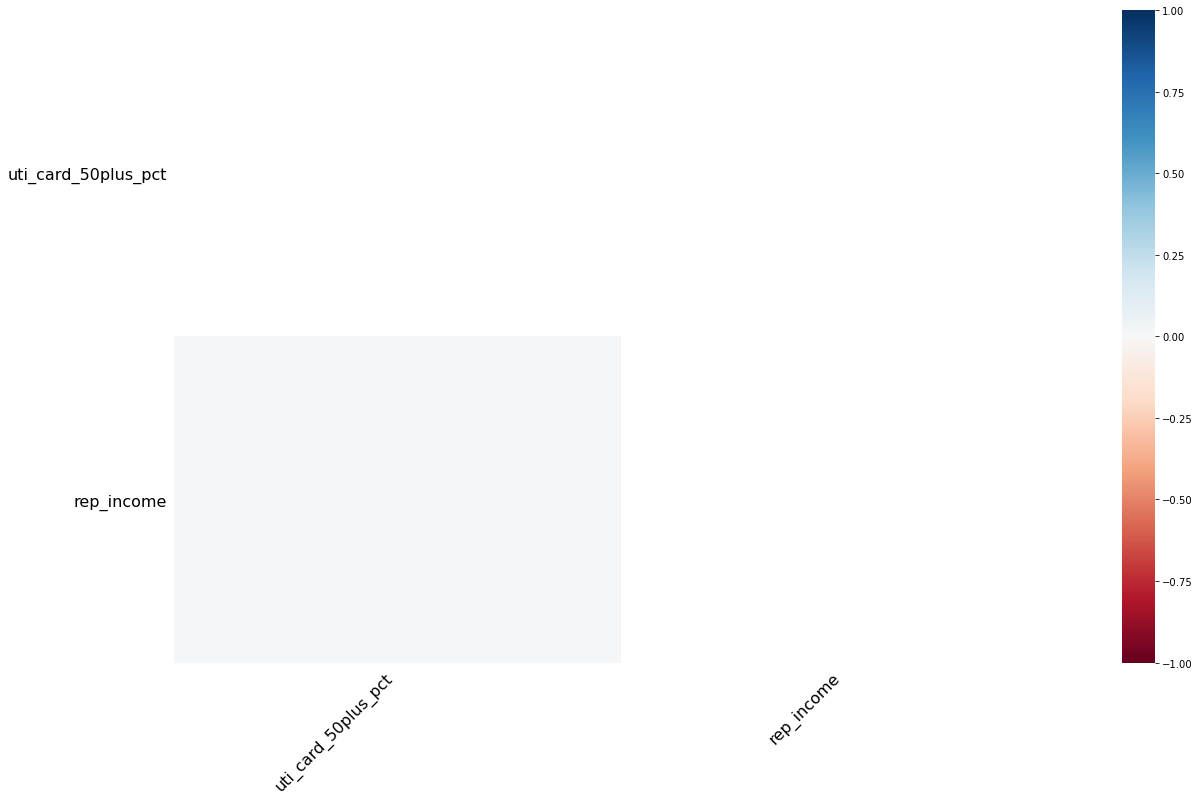

In [10]:
msno.heatmap(data_train.drop('Default_ind', axis=1))

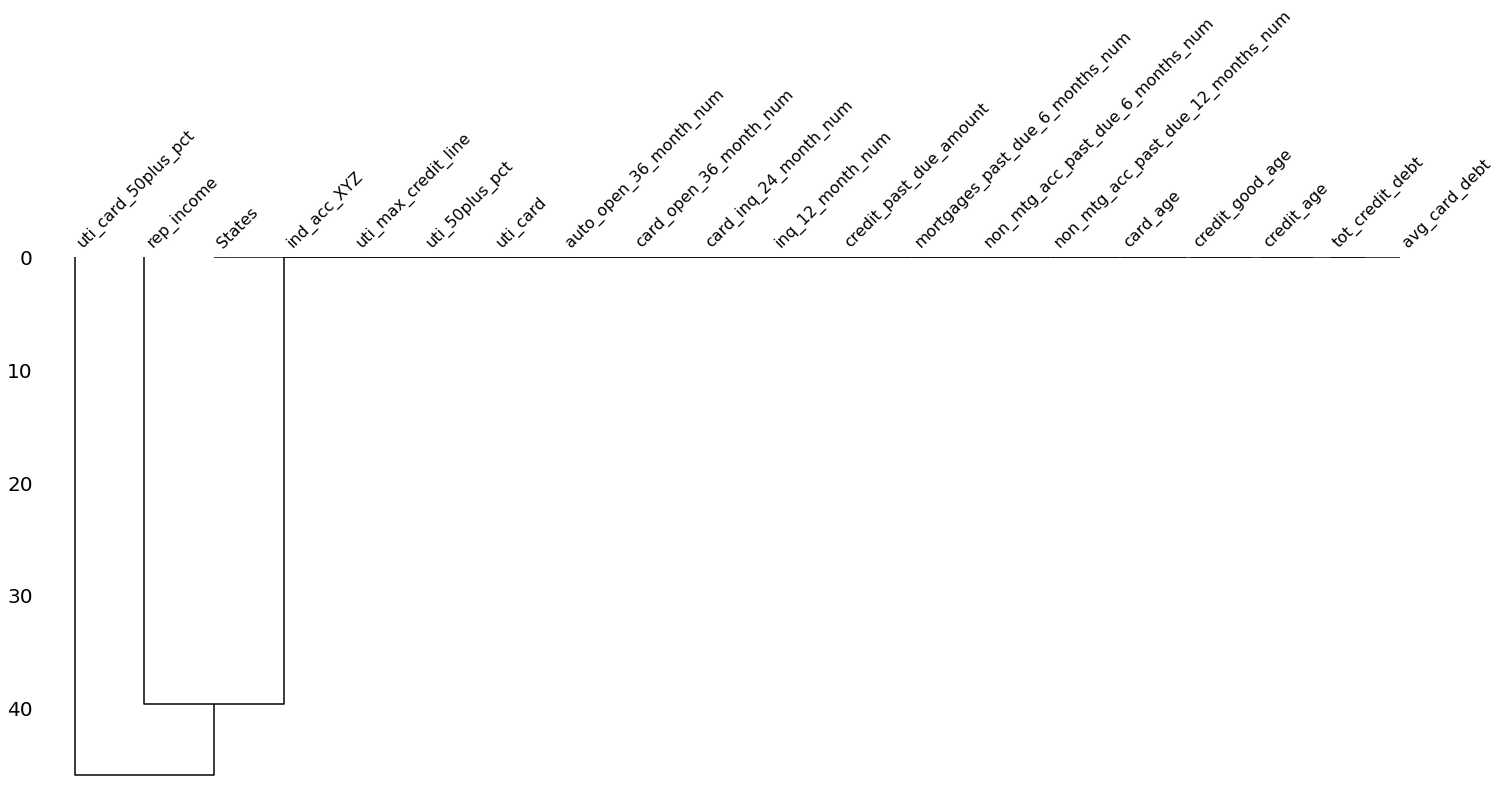

<Figure size 432x288 with 0 Axes>

In [11]:
msno.dendrogram(data_train.drop('Default_ind', axis=1))
dendrotain=plt.figure()

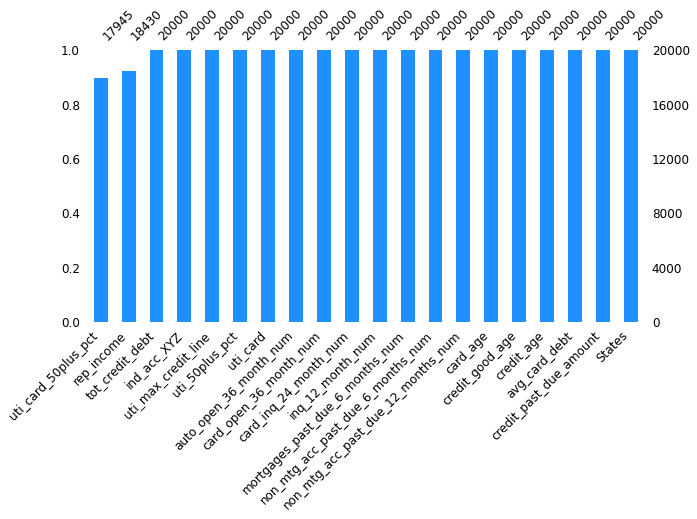

In [12]:
msno.bar(data_train.drop('Default_ind', axis=1), color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

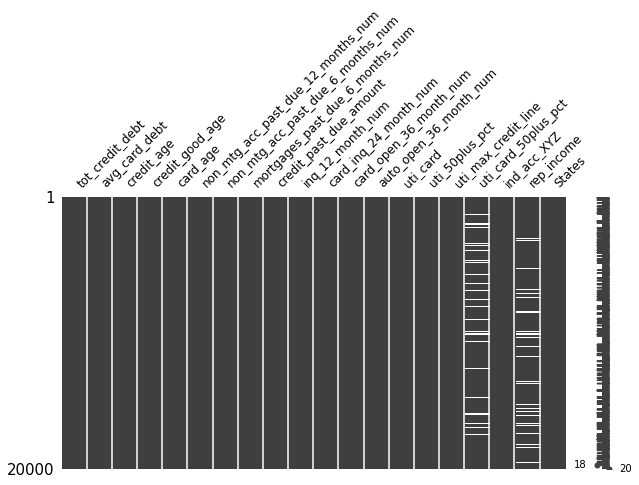

In [13]:
msno.matrix(data_train.drop('Default_ind', axis=1),figsize=(10,5), fontsize=12)

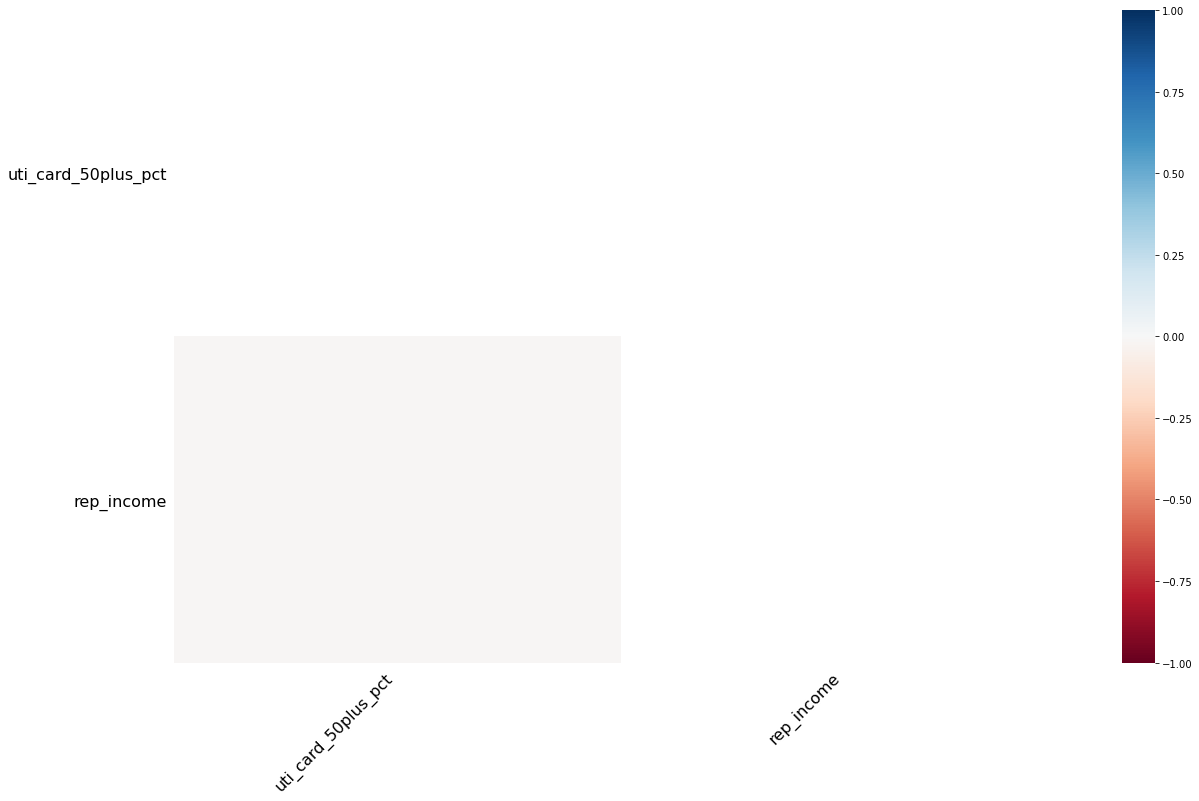

In [14]:
msno.heatmap(data_Vali.drop('Default_ind', axis=1))

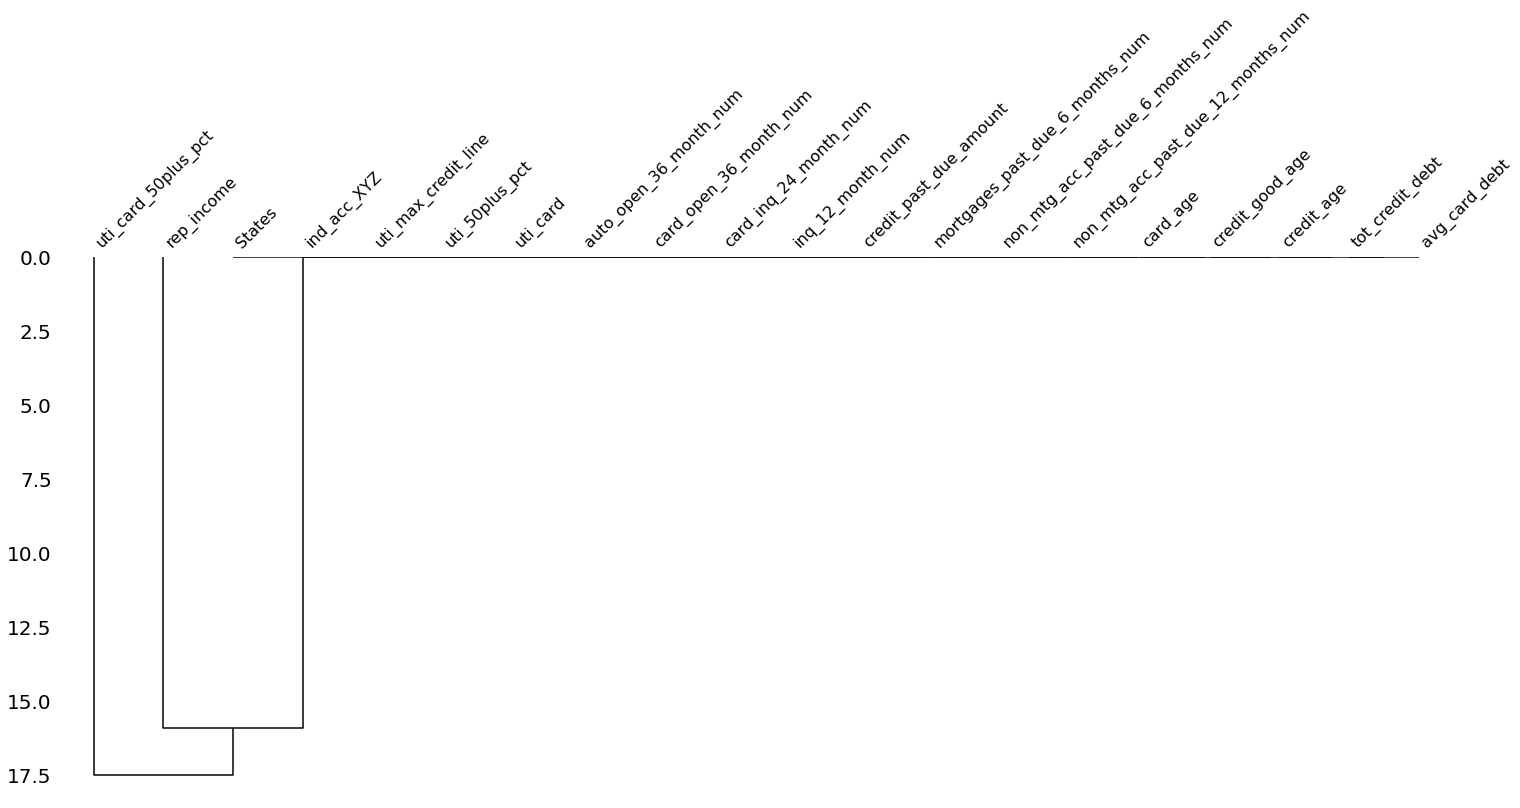

In [15]:
msno.dendrogram(data_Vali.drop('Default_ind', axis=1))

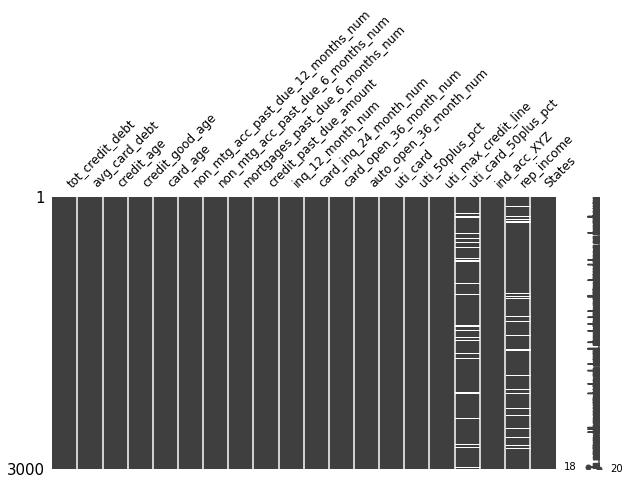

In [17]:
msno.matrix(data_Vali.drop('Default_ind', axis=1),figsize=(10,5), fontsize=12)

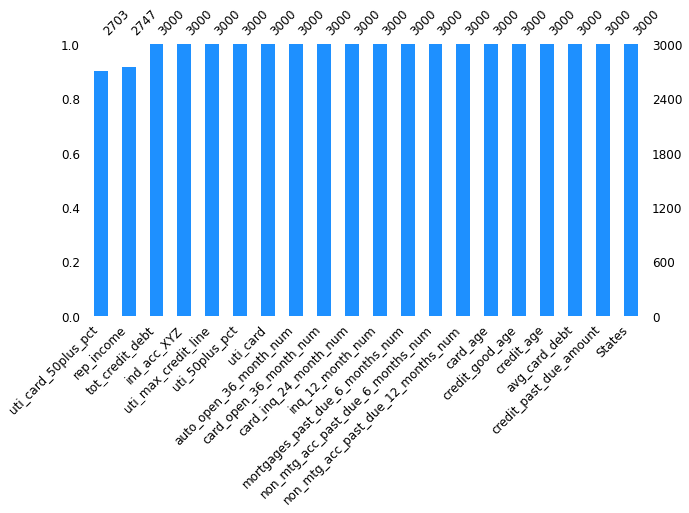

In [16]:
msno.bar(data_Vali.drop('Default_ind', axis=1), color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

## Listwise deletion

In [16]:
def deletion(dataframe):
    data=dataframe.copy()
    data_cc=data.dropna()
    data_cc_reind=data_cc.set_index([pd.Index(range(len(data_cc)))])
    return(data_cc_reind)

In [22]:
deletion(dataVali).to_csv("C:/Users/12783/Downloads/Listwise_deletion_Validation.csv")

In [20]:
deletion(datatest).to_csv("C:/Users/12783/Downloads/Listwise_deletion_Test.csv")

## Unconditional mean, mode, median

In [22]:
# mean
def unconditional_mean(dataframe):
    data=dataframe.copy()
    miss=data.columns[data.isna().any()].tolist()
    for i in miss:
        fil=round(data[i].dropna().mean(),9)
        data[i] = data[i].fillna(fil)
    return(data)

In [25]:
unconditional_mean(datatest).to_csv("C:/Users/12783/Downloads/Unconditional_mean_impute_Test.csv")

In [23]:
unconditional_mean(dataVali).to_csv("C:/Users/12783/Downloads/Unconditional_mean_impute_Validation.csv")

In [10]:
# mode
def unconditional_mode(dataframe):
    data=dataframe.copy()
    miss=data.columns[data.isna().any()].tolist()
    for i in miss:
        fil=st.mode(list(data[i].dropna()))
        data[i] = data[i].fillna(fil)
    return(data)

In [13]:
# median
def unconditional_median(dataframe):
    data=dataframe.copy()
    miss=data.columns[data.isna().any()].tolist()
    for i in miss:
        fil=st.median(list(data[i].dropna()))
        data[i] = data[i].fillna(fil)
    return(data)

In [14]:
unconditional_median(dataVali).to_csv("C:/Users/12783/Downloads/Unconditional_median_impute_Validation.csv")

In [19]:
unconditional_median(datatest).to_csv("C:/Users/12783/Downloads/Unconditional_median_impute_Test.csv")